In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
path_video = '../DATA/octopus_recording_video/kratos__2020_12_2020__19_42_21_100__2__6000.mp4'
if os.path.exists(path_video) != True:
    print(f'{path_video} does not exist!')
else:
    print(f'opening {path_video}')

frames = []
cap = cv2.VideoCapture(path_video)
l = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
pbar = tqdm(total=l, position=0, leave=True)
for i in range(0,l):
    success, img = cap.read()
    if success:
        frames.append(img)
    else:
        print(f'failed to read {i}')
    pbar.update(n=1)
pbar.close()

cap.release()

opening ../DATA/octopus_recording_video/kratos__2020_12_2020__19_42_21_100__2__6000.mp4


100%|██████████| 392/392 [00:01<00:00, 244.22it/s]


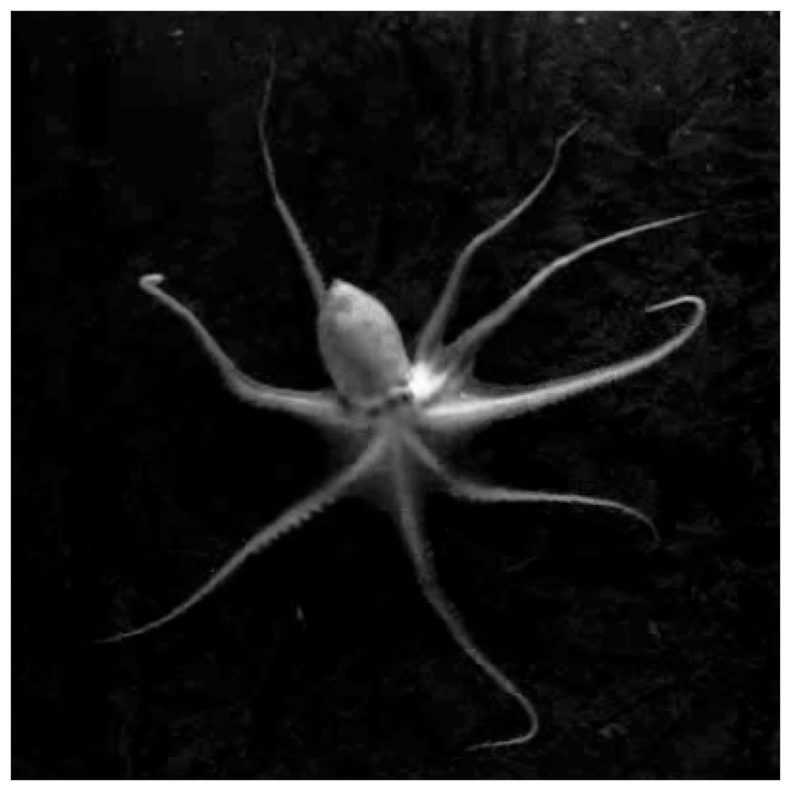

In [41]:
img_frame_number = 210

x0, x1 = 550, 950
y0, y1 = 300, 700

fig, ax = plt.subplots(1,1,figsize=(10,10))

frame = frames[img_frame_number].copy()
frame = frame[y0:y1, x0:x1]
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
ax.imshow(frame, cmap='Greys_r')

ax.grid(None)
ax.set_xticks([])
ax.set_yticks([])

plotDir = 'octopusImages'
if os.path.exists(plotDir) != True:
    os.mkdir(plotDir)
figname = os.path.join(plotDir, 'maleOctopus.png')

fig.savefig(figname, dpi=300)

plt.show(fig)
plt.close(fig)